# Regresión de una función lineal con Theano.

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## Utilizando Theano crear un modelo que permita obtener los parámetros de un función lineal con termino independiente.
- y = w1x + w0

In [2]:
import theano
import theano.tensor as T

#print theano.config.device
#print theano.config.floatX

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


### Los valores para ajustar se pueden obtener con las siguientes lineas de código: 
- trX = np.linspace(-1, 1, 101)
- trY = 3 \* trX + 5 + np.random.randn(\*trX.shape) \* 0.33

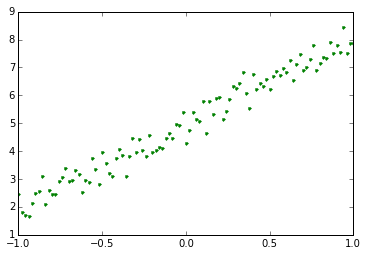

In [44]:
trX = np.linspace(-1, 1, 101)
trY = 3 * trX + 5 + np.random.randn(*trX.shape) * 0.33

# Plot results.
plt.plot(trX, trY, 'g.')
plt.show()

### Consejo: Crear una función de gradiente para cada una de las parámetros de la curva y utilizarlas para actualizar los valores de la forma:
- updates = [[w_0, w_0 - gradient_0 * 0.01], [w_1, w_1 - gradient_1 * 0.01]]

En el paso  1  el valor de w_1 es  1.01887545606  el valor de w_0 es  5.03828223548


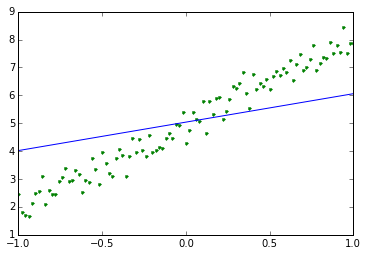

En el paso  3  el valor de w_1 es  2.45116352275  el valor de w_0 es  5.20654223842


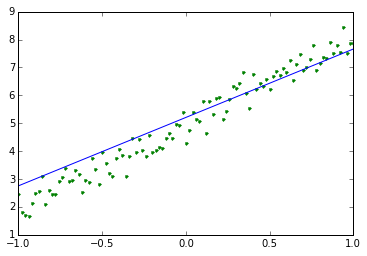

En el paso  5  el valor de w_1 es  2.89551696413  el valor de w_0 es  5.04624350385


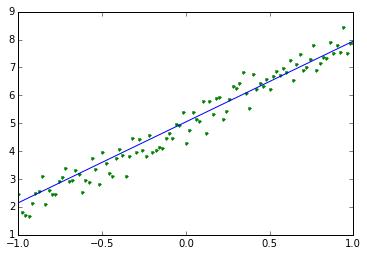

En el paso  7  el valor de w_1 es  3.01023947334  el valor de w_0 es  5.00203444932


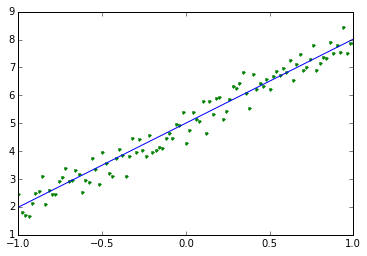

En el paso  9  el valor de w_1 es  3.03955099353  el valor de w_0 es  4.99069399017


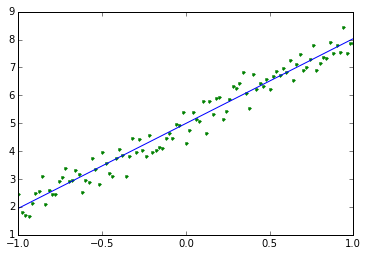

En el paso  11  el valor de w_1 es  3.04703515896  el valor de w_0 es  4.98779768223


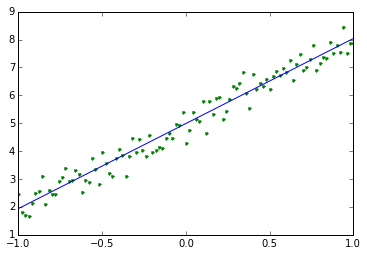

In [70]:
# Inicializamos X e Y
X = T.scalar()
Y = T.scalar()

# Definimos el modelo (y = w1x + w0)
def model(X, w_0, w_1):
    return X * w_1 + w_0 

# Inizializamos w_0 y w_1
w_0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w_1 = theano.shared(np.asarray(1., dtype = theano.config.floatX))

# Calculamos y
y = model(X, w_0, w_1)

# Funcion de coste
cost     = T.mean(T.sqr(y - Y))

# Construimos el Gradiente Descendiente
gradient_0 = T.grad(cost = cost, wrt = w_0)
gradient_1 = T.grad(cost = cost, wrt = w_1)

# Actualizacion simultanea
updates  = [[w_0, w_0 - gradient_0 * 0.01], [w_1, w_1 - gradient_1 * 0.01]]

# Entrenamos el modelo
train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

# Ejecucion del Gradiente Descendiente
for i in range(11):
    
    for x, y in zip(trX, trY):
        costM + train(x, y)
    
    if i%2 == 0:
        print 'En el paso ', i+1, ' el valor de w_1 es ', w_1.get_value(), ' el valor de w_0 es ', w_0.get_value()
        
        # Plot results.
        plt.plot(trX, trY, 'g.')
        plt.plot(trX, model(trX, w_0.get_value(), w_1.get_value()))
        plt.show()